# IMPORT NESCESSARY LIBRARY

In [1]:
import matlab.engine
import cv2
import matlab
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
import pandas as pd

# STRART MATLAB ENGINE

In [2]:
eng = matlab.engine.start_matlab()

# IMAGE PRE-PROCCESSING WITH ALM

In [3]:
file_names = 'Jupyter/IM-0001-0001.jpg'
ret = eng.Example_image_denoise('/media/tuminh14/New Volume/Window/NCKH/Data/4saldetect/KNEE/IRMDUGENOU/3D_mFFEXL-401/IM-0001-0001.jpg',file_names)

# IMPORT IMAGE ORIGIN AND PROCESSED

(Text(0.5, 1.0, 'deconvted'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

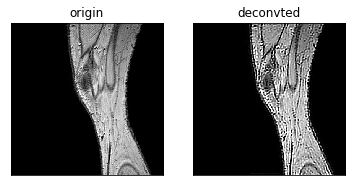

In [4]:
origin = cv2.imread('/media/tuminh14/New Volume/Window/NCKH/Data/4saldetect/KNEE/IRMDUGENOU/3D_mFFEXL-401/IM-0001-0001.jpg',0)
deconvted = cv2.imread('/media/tuminh14/New Volume/Window/NCKH/Deconvtv_out/Jupyter/IM-0001-0001.jpg',0)

plt.subplot(1,2,1),plt.imshow(origin,cmap = 'gray')
plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(deconvted,cmap = 'gray')
plt.title('deconvted'), plt.xticks([]), plt.yticks([])

# DETECT SALIENCY MAP

(Text(0.5, 1.0, 'deconvted'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

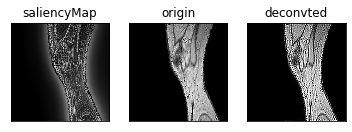

In [5]:
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(deconvted)
plt.subplot(1,3,1),plt.imshow(saliencyMap,cmap = 'gray')
plt.title('saliencyMap'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(origin,cmap = 'gray')
plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(deconvted,cmap = 'gray')
plt.title('deconvted'), plt.xticks([]), plt.yticks([])

# EDGE DETECTION WITH SOBEL

(Text(0.5, 1.0, 'edge_x+y=112919'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

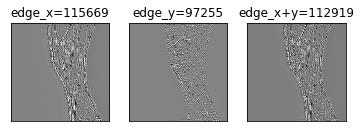

In [6]:
sobelx_deconvted = cv2.Sobel(saliencyMap,cv2.CV_64F,1,0,ksize=3)  # x
num_of_edge_x = np.count_nonzero(sobelx_deconvted)
sobely_deconvted = cv2.Sobel(saliencyMap,cv2.CV_64F,0,1,ksize=3)  # y
num_of_edge_y = np.count_nonzero(sobely_deconvted)
sobel_edge_deconvted = (sobelx_deconvted + sobely_deconvted)
num_of_edge_sobel = np.count_nonzero(sobel_edge_deconvted)

# show image
plt.subplot(1,3,1),plt.imshow(sobelx_deconvted,cmap = 'gray')
plt.title('edge_x='+str(num_of_edge_x)), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobely_deconvted,cmap = 'gray')
plt.title('edge_y='+str(num_of_edge_y)), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_edge_deconvted,cmap = 'gray')
plt.title('edge_x+y='+str(num_of_edge_sobel)), plt.xticks([]), plt.yticks([])

# OTHER METHOD
## SOBEL WITH ORIGIN

(Text(0.5, 1.0, 'edge_x+y=60085'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

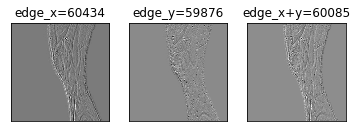

In [7]:
sobelx_origin = cv2.Sobel(origin,cv2.CV_64F,1,0,ksize=3)  # x
num_of_edge_x_origin = np.count_nonzero(sobelx_origin)
sobely_origin = cv2.Sobel(origin,cv2.CV_64F,0,1,ksize=3)  # y
num_of_edge_y_origin = np.count_nonzero(sobely_origin)
sobel_edge_origin = (sobelx_origin + sobely_origin)
num_of_edge_sobel_origin = np.count_nonzero(sobel_edge_origin)
# show image
plt.subplot(1,3,1),plt.imshow(sobelx_origin,cmap = 'gray')
plt.title('edge_x='+str(num_of_edge_x_origin)), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobely_origin,cmap = 'gray')
plt.title('edge_y='+str(num_of_edge_y_origin)), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_edge_origin,cmap = 'gray')
plt.title('edge_x+y='+str(num_of_edge_sobel_origin)), plt.xticks([]), plt.yticks([])

## CANNY WITH ORIGIN

(Text(0.5, 1.0, 'edge_canny=14155'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

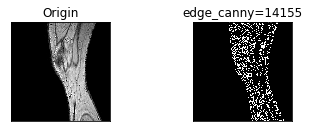

In [8]:
edges_canny = cv2.Canny(origin,100,200)
num_of_edge_canny = np.count_nonzero(edges_canny)

# show image
plt.subplot(2,2,1),plt.imshow(origin,cmap = 'gray')
plt.title('Origin'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(edges_canny,cmap = 'gray')
plt.title('edge_canny='+str(num_of_edge_canny)), plt.xticks([]), plt.yticks([])

## Paper method

(Text(0.5, 1.0, 'Edge=9786'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

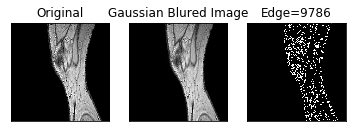

In [9]:
gau_image = cv2.GaussianBlur(origin,(3,3),0)
gau_image_canny = cv2.Canny(gau_image,100,200)
num_edge_paper = np.count_nonzero(gau_image_canny)

plt.subplot(1,3,1),plt.imshow(origin,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(gau_image,cmap = 'gray')
plt.title('Gaussian Blured Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(gau_image_canny,cmap = 'gray')
plt.title('Edge='+str(num_edge_paper)), plt.xticks([]), plt.yticks([])

In [10]:
psnr_plot =  pd.read_csv('psnr3.csv')

In [11]:
psnr_plot.head()

,File name,psnr,num edge origin with sobel,num edge origin with canny,num edge with ALM and saliency,num edge paper method
0,3D_mFFEXL-401/IM-0001-0001.jpg,21.567858,60085,14155,112813,9786
1,3D_mFFEXL-401/IM-0001-0004.jpg,21.268125,60764,14338,114589,10033
2,3D_mFFEXL-401/IM-0001-0007.jpg,21.035811,61786,14381,115294,10400
3,3D_mFFEXL-401/IM-0001-0010.jpg,21.043083,62746,14654,114531,10763
4,3D_mFFEXL-401/IM-0001-0013.jpg,21.027510,63446,14938,115567,11212


# COMPARE RESULT

## SOBEL, CANNY, ALM+SAL+SOBEL+PAPER

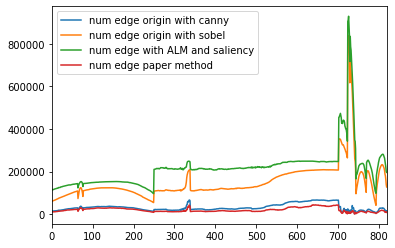

In [12]:
psnr_plot.plot(y=["num edge origin with canny","num edge origin with sobel","num edge with ALM and saliency","num edge paper method"],kind="line")

## ALM+SAL+SOBEL VS CANNY

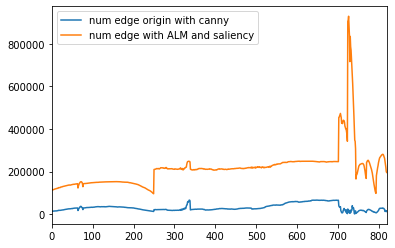

In [13]:
psnr_plot.plot(y=["num edge origin with canny","num edge with ALM and saliency"],kind="line")

## ALM+SAL+SOBEL VS SOBEL

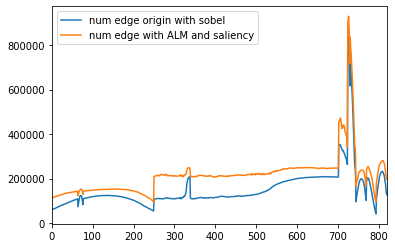

In [14]:
psnr_plot.plot(y=["num edge origin with sobel","num edge with ALM and saliency"],kind="line")

# ALM+SAL+SOBEL VS PAPER

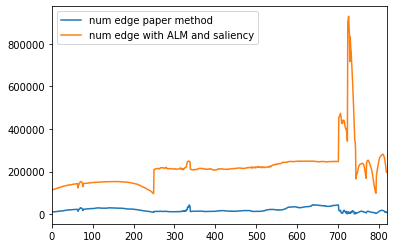

In [15]:
psnr_plot.plot(y=["num edge paper method","num edge with ALM and saliency"],kind="line")